In [12]:
pwd

'/home/kristian/Desktop/data'

In [11]:
cd data

/home/kristian/Desktop/data


In [14]:
ls gapminder*

f.txt                           gapminder_total_fertility.csv*  mydatabase.db
gapminder_gdp_per_capita.json*  geo.json*                       README.md*
gapminder_lifeexpectancy.xlsx*  germany.csv*                    sq.py
gapminder_population.xlsx*      grosse_laender_2015.csv*


In [15]:
import pandas as pd

df = pd.read_excel('/home/kristian/Desktop/gapminder_population.xlsx')

In [22]:
%matplotlib inline

In [6]:
df.shape

(275, 82)

In [8]:
df.head(3)

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Move a column to the index

In [51]:
df2.index.name = 'country'

In [24]:
df2 = df.set_index('Total population') # <-- column name OR actual column
df2.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# moving around the index helps with selecting
s = df2.loc[['Finland', 'Afghanistan', 'Japan'], 1950]
s

Total population
Finland         4008299.0
Afghanistan     7752118.0
Japan          82199470.0
Name: 1950, dtype: float64

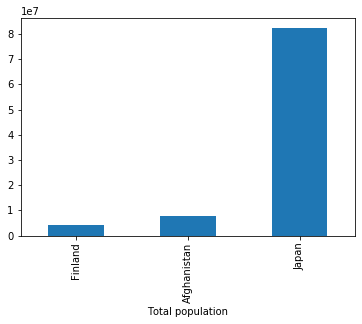

In [23]:
# moving around the index helps with plotting
s.plot.bar()

### 2. Move the index into a column

In [52]:
df = df2.reset_index()
df.head(3)

,country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


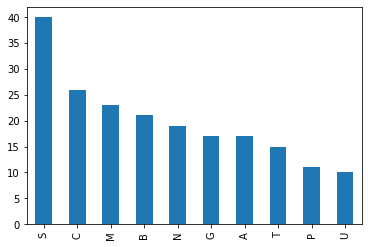

In [30]:
# count first characters
df['Total population'].str[0].value_counts().head(10).plot.bar()

### 3. Transpose

In [36]:
gf = df2.transpose()[['Germany', 'France']]
gf.head()

Total population,Germany,France
1800,22886919.0,29355111.0
1810,23882461.0,30293172.0
1820,25507768.0,31549988.0
1830,28016571.0,33174810.0
1840,31016143.0,34854476.0


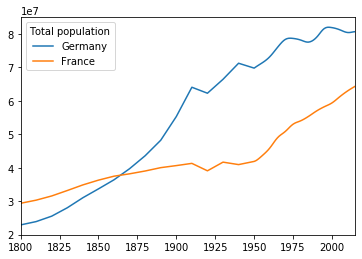

In [39]:
gf.plot()

### 4. Transform Long to Wide format and back

In [42]:
# Long format: many rows, 1 column
s = df2.stack()   # <-- results in a Series
s                 # MultiIndex: 2 levels (country, year)

Total population               
Afghanistan                1800    3280000.0
                           1810    3280000.0
                           1820    3323519.0
                           1830    3448982.0
                           1840    3625022.0
                                     ...    
Sint Maarten (Dutch part)  2011      33979.0
                           2012      35134.0
                           2013      36442.0
                           2014      37696.0
                           2015      38745.0
Length: 20176, dtype: float64

In [49]:
# Wide format: few rows, many columns
s.unstack(0) # <-- can be 0 or 1 , default is 1

Total population,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,Curaçao,Sint Maarten (Dutch part)
1800,3280000.0,NaN,410445.0,2503218.0,8170.0,2654.0,1567028.0,2025.0,37000.0,534000.0,...,NaN,NaN,2593000.0,NaN,747000.0,1085814.0,NaN,1027378.0,NaN,NaN
1810,3280000.0,NaN,423591.0,2595056.0,8156.0,2654.0,1567028.0,2025.0,37000.0,534000.0,...,NaN,NaN,2593000.0,NaN,747000.0,1085814.0,NaN,1041076.0,NaN,NaN
1820,3323519.0,NaN,438671.0,2713079.0,8142.0,2700.0,1597530.0,2064.0,37000.0,570719.0,...,NaN,NaN,2605438.0,NaN,747000.0,1106634.0,NaN,1063732.0,NaN,NaN
1830,3448982.0,NaN,457234.0,2880355.0,8128.0,2835.0,1686390.0,2177.0,37000.0,686703.0,...,NaN,NaN,2640779.0,NaN,747000.0,1167259.0,NaN,1103246.0,NaN,NaN
1840,3625022.0,NaN,478227.0,3082721.0,8114.0,3026.0,1813100.0,2338.0,37000.0,873747.0,...,NaN,NaN,2689275.0,NaN,747000.0,1253642.0,NaN,1153401.0,NaN,NaN
1850,3810047.0,NaN,506889.0,3299305.0,7958.0,3230.0,1949329.0,2511.0,37000.0,1113189.0,...,NaN,NaN,2738662.0,NaN,747000.0,1346417.0,NaN,1205835.0,NaN,NaN
1860,3973968.0,NaN,552800.0,3536468.0,7564.0,3436.0,2110747.0,2693.0,36532.0,1421333.0,...,NaN,NaN,2796168.0,NaN,746052.0,1444385.0,NaN,1329906.0,NaN,NaN
1870,4169690.0,NaN,610036.0,3811028.0,7057.0,3654.0,2285417.0,2888.0,35546.0,1856886.0,...,NaN,NaN,2866728.0,NaN,745105.0,1549480.0,NaN,1462765.0,NaN,NaN
1880,4419695.0,NaN,672544.0,4143163.0,6582.0,3885.0,2473597.0,3097.0,35222.0,2493156.0,...,NaN,NaN,2960773.0,NaN,744157.0,1661683.0,NaN,1604755.0,NaN,NaN
1890,4710171.0,NaN,741688.0,4525691.0,6139.0,4131.0,2677047.0,3320.0,36286.0,3402273.0,...,NaN,NaN,3070113.0,NaN,743210.0,1781947.0,NaN,1756589.0,NaN,NaN


In [44]:
df2.shape

(275, 81)

In [47]:
s.sample(10)

Total population      
Saudi Arabia      1950      3121336.0
Uruguay           1971      2818269.0
China             1953    580886559.0
Malawi            1985      7205635.0
Nepal             1994     20859421.0
Papua New Guinea  1995      4715929.0
Timor-Leste       1870       238455.0
Mexico            1952     29711632.0
Finland           2013      5453061.0
Wallis et Futuna  1958         8262.0
dtype: float64